In [40]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt

start_date = '2001-01-01'
end_date = '2021-08-20'

def load_financial_data(start_date, end_date, output_file, ticker):
    try:
        df = pd.read_pickle(output_file)
    except FileNotFoundError:
        df = data.DataReader(ticker, 'yahoo', start_date, end_date)
        df.to_pickle(output_file)

    return df


In [41]:
ticker = 'BABA'
data = load_financial_data(start_date, end_date,
                           output_file=ticker.lower() + '_data_large.pkl', ticker=ticker)

In [42]:
def double_moving_average(financial_data, short_window, long_window):
    signals = pd.DataFrame(index=financial_data.index)
    signals['signal'] = 0.0
    signals['short_mavg'] = financial_data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = financial_data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['orders'] = signals['signal'].diff()
    
    return signals


In [43]:
ts = double_moving_average(data, 20, 100)
# print(ts)

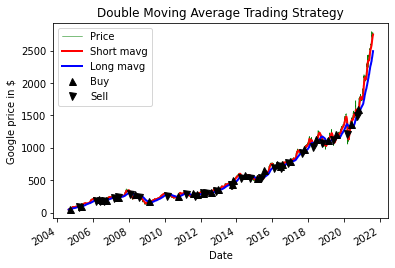

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
data["Adj Close"].plot(ax=ax1, color='g', lw=.5)
ts["short_mavg"].plot(ax=ax1, color='r', lw=2.)
ts["long_mavg"].plot(ax=ax1, color='b', lw=2.)

ax1.plot(ts.loc[ts.orders == 1.0].index,
         data["Adj Close"][ts.orders == 1.0],
         '^', markersize=7, color='k')

ax1.plot(ts.loc[ts.orders == -1.0].index,
         data["Adj Close"][ts.orders == -1.0],
         'v', markersize=7, color='k')

plt.legend(["Price", "Short mavg", "Long mavg", "Buy", "Sell"])
plt.title("Double Moving Average Trading Strategy")

plt.show()